<h2>Import packages and data</h2>

In [1]:
from scipy.io import netcdf
import similarity_measures as sim
import calculations as calc
import comparing as comp
import combining as comb
import plots
import numpy as np

In [2]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

<h2>Derive QBO</h2>

In [3]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

<h1>Combine similarity measures</h1>

In [4]:
print(plots.plot_similarity_measures_combinations.__doc__)


    Plot a matrix of combinations of two similarity measures. The combination_func defines how the
    values are combined.

    Before the values are combined, they are binned in 10% bins using
    comparing.binning_values_to_quantiles.

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, latitude, longitude
        reference_series (numpy.ndarray): 1 dimensional reference series
        combination_func (function): Function that comines two similarity values into one
        measures (list): List of similarity measures to compute similarity between two time series
        labels (list): List of labels for the measures
        scaling_func (function, optional): Function that takes a map of similarity values and scales them in order
                                           to make the similarity values of different similarity measures comparable
            Defaults to comp.binning_values_to_quantiles
        level (int, optional): Level on which the si

<h5>Measures like Transfer Entropy and Manhattan Distance have to be inverted so higher value always means higher similarity<h5>

In [5]:
measures = [sim.pearson_correlation, sim.mutual_information, comp.invert(sim.transfer_entropy), comp.invert(sim.manhattan_distance)]

In [6]:
measure_labels = ["Pearson's Correlation", "Mutual Information", "Transfer Entropy", "Manhattan Distance"]

<h5>Define a scaling function that scales the value ranges of the different similarity measures to make them comparable</h5>

In [7]:
print(comp.binning_values_to_quantiles.__doc__)


    Convert a map of values into n percentile bins.

    Each value on the map is replaced with the percentage bin it belongs to.
    0.3 means this value belongs to the 20%-30% bin which contains the 20%-30%
    smallest values of the map.

    All the bins have the same size

    Args:
        map_array (array): Map with values to scale
        num_bins (int): Number or bins

    Returns:
        Map with the bin numbers for each value
    


In [8]:
scaling_func = comp.binning_values_to_quantiles

<h3>Combining values by multiplying the scaled values of two similarity measures</h3>
Since the value ranges are scaled to [0.1, 1] by the binning, the value range for the combined similarity is [0.01, 1] with 1 meaning high similarity in both similarity measures and 0.01 low similarity in both similarity measures.

In [9]:
combination_func = comb.mult

C:\Users\tousp\Climate-Similarity-Metrics\plots.py:286: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax[i][j])


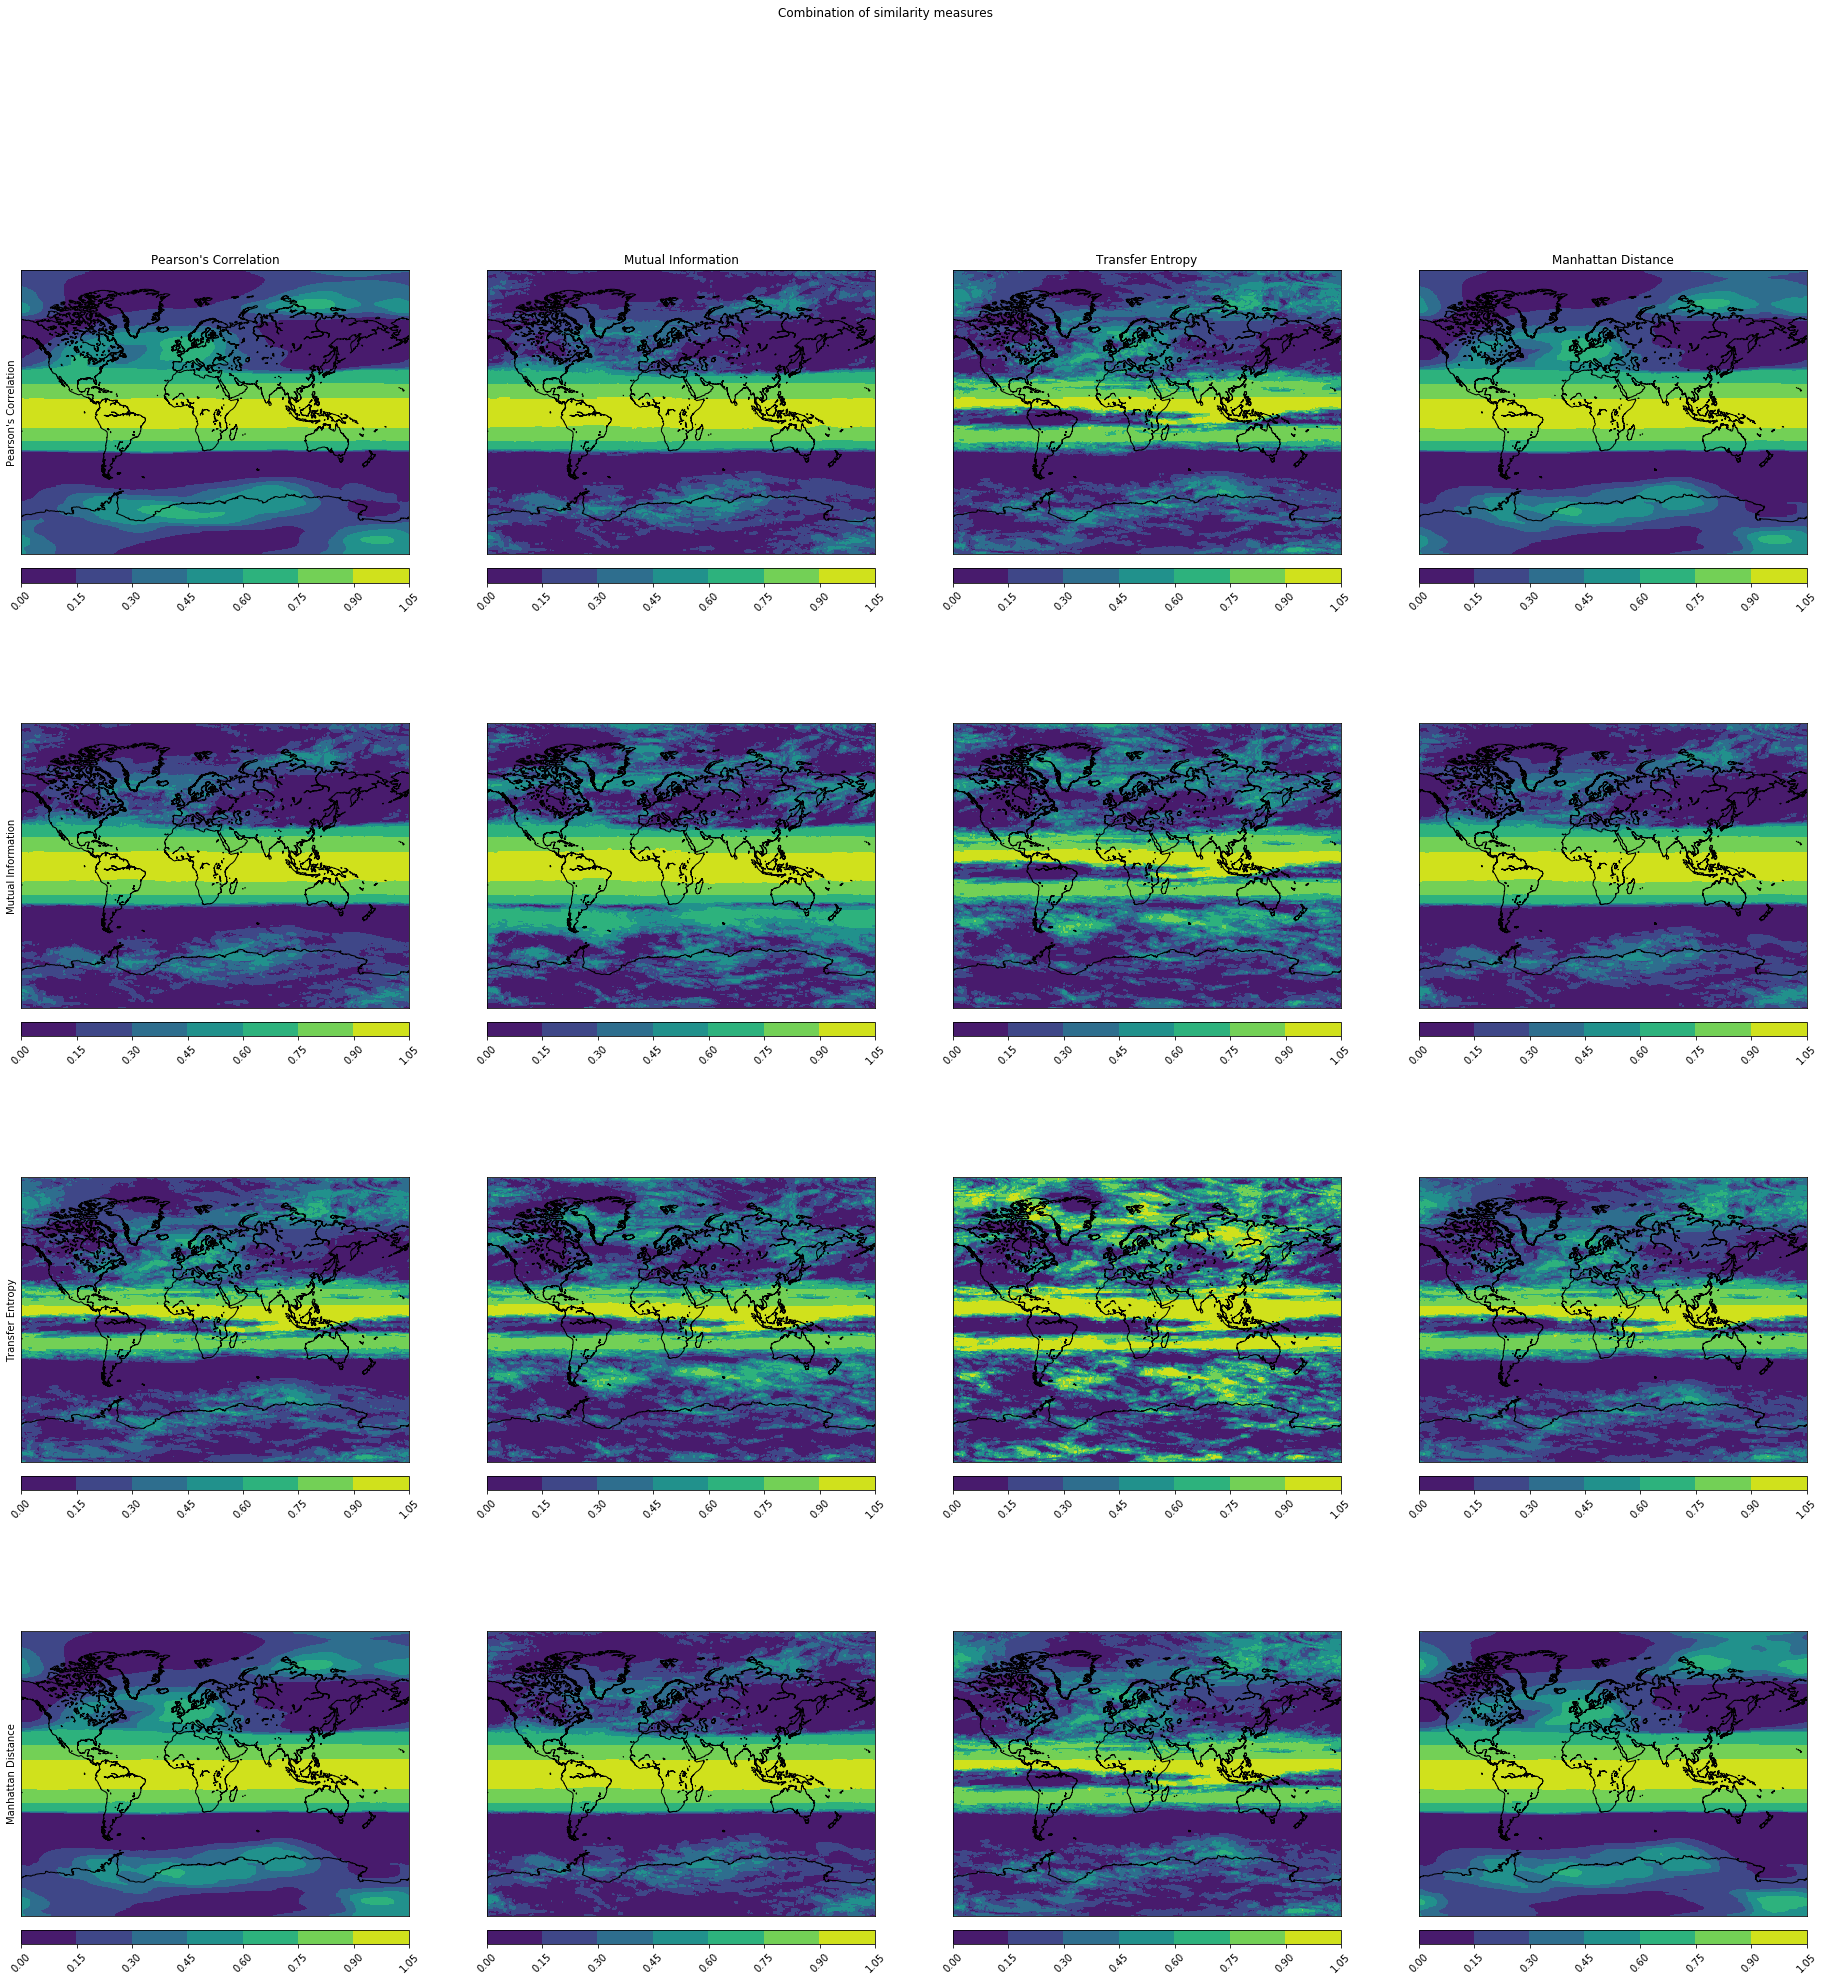

In [10]:
plots.plot_similarity_measures_combinations(u_l30, qbo_equator, combination_func, measures, measure_labels, scaling_func)

<h3>Combining values by adding the scaled values of two similarity measures</h3>
Since the value ranges are scaled to [0.1, 1] by the binning, the value range for the combined similarity is [0.2, 2] with 2 meaning high similarity in both similarity measures and 0.2 low similarity in both similarity measures.

In [12]:
combination_func = comb.sum

In [ ]:
plots.plot_similarity_measures_combinations(u_l30, qbo_equator, combination_func, measures, measure_labels, scaling_func)

<h2>Plot the power of dependency</h2>
If we are only interested in the strength of the dependency and not in the direction, we combine the scaled similarity values with the absolute values of Pearson's Correlation.

In [ ]:
print(plots.plot_power_of_dependency.__doc__)

In [ ]:
measures = [sim.mutual_information, comp.invert(sim.transfer_entropy), comp.invert(sim.manhattan_distance)]

In [ ]:
measure_labels = ["Mutual Information", "Transfer Entropy", "Manhattan Distance"]

In [ ]:
plots.plot_power_of_dependency(u_l30, qbo_equator, comb.mult, measures, measure_labels, scaling_func)